# 라이브러리 설치

In [1]:
pip install pyvisa

   ---------------------------------------- 0.0/176.7 kB ? eta -:--:--
   -- ------------------------------------- 10.2/176.7 kB ? eta -:--:--
   ---------------------------------------  174.1/176.7 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 176.7/176.7 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\gh159\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install pyvisa-py

   ---------------------------------------- 0.0/75.6 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.6 kB ? eta -:--:--
   ---------------------------------------- 75.6/75.6 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\gh159\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install zeroconf

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 1.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.7 MB 5.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.7 MB 6.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.7 MB 6.7 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.7 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\gh159\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install gpib-ctypes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\gh159\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 기본 구조

In [7]:
import pyvisa
rm = pyvisa.ResourceManager()
print(rm.list_resources())

('USB::0x05E6::0x2461::04628945::INSTR',)


In [2]:
instrument = rm.open_resource('USB::0x05E6::0x2461::04628945::INSTR')

In [8]:
try:
    # Query the instrument ID
    idn_response = instrument
    print("Connected to:", idn_response)

except pyvisa.VisaIOError as e:
    print(f"An error occurred: {e}")

Connected to: USBInstrument at USB0::0x05E6::0x2461::04628945::0::INSTR


Voltage: 0.0, Current: -6.154726e-09
Voltage: 0.1, Current: -2.578205e-10
Voltage: 0.2, Current: -2.971285e-10
Voltage: 0.30000000000000004, Current: -2.357525e-10
Voltage: 0.4, Current: -2.543721e-10
Voltage: 0.5, Current: -2.378213e-10
Voltage: 0.6000000000000001, Current: -1.985133e-10
Voltage: 0.7000000000000001, Current: -2.77819e-10
Voltage: 0.8, Current: -2.067886e-10
Voltage: 0.9, Current: -2.09547e-10
Voltage: 1.0, Current: -2.674746e-10
Voltage: 1.1, Current: -1.714449e-11
Voltage: 1.2000000000000002, Current: 1.153119e-09
Voltage: 1.3, Current: 9.81596e-09
Voltage: 1.4000000000000001, Current: 7.451003e-08
Voltage: 1.5, Current: 5.690148e-07
Voltage: 1.6, Current: 4.704701e-06
Voltage: 1.7000000000000002, Current: 4.895554e-05
Voltage: 1.8, Current: 0.000476303
Voltage: 1.9000000000000001, Current: 0.002174383
Voltage: 2.0, Current: 0.005724423
Voltage: 2.1, Current: 0.01194119
Voltage: 2.2, Current: 0.02000154
Voltage: 2.3000000000000003, Current: 0.02000148
Voltage: 2.4000

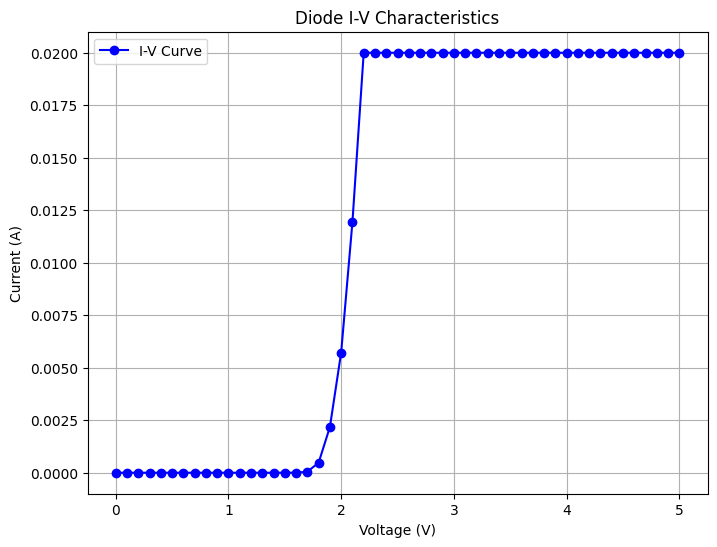

In [23]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt

# 1. PyVISA ResourceManager 생성 및 장치 연결
rm = pyvisa.ResourceManager()
instrument = rm.open_resource('USB0::0x05E6::0x2461::04628945::INSTR')  # 장치 주소 확인 후 수정

# 2. 타임아웃 및 종료 문자 설정
instrument.timeout = 10000  # 타임아웃을 10초로 설정
instrument.write_termination = '\n'
instrument.read_termination = '\n'

# 3. 장치 초기화 및 오류 클리어
instrument.write("*RST")  # 장비 리셋
instrument.write("*CLS")  # 상태 클리어

# 4. 다이오드 테스트 설정
try:
    # 소스 및 측정 모드 설정
    instrument.write(":SOURce:FUNCtion VOLTage")          # 전압 소스 모드 설정
    instrument.write(":SENSe:FUNCtion 'CURRent'")         # 전류 측정 모드 활성화
    instrument.write(":SOURce:VOLTage:RANGe:AUTO ON")     # 자동 전압 범위 활성화
    instrument.write(":SENSe:CURRent:RANGe:AUTO ON")      # 자동 전류 범위 활성화

    # 보호 설정 (과전류 제한)
    instrument.write(":SOURce:VOLTage:ILIMit 0.02")   # 최대 전류 제한 (20mA)

    # 출력 활성화
    instrument.write(":OUTPut ON")

    # 데이터 수집 준비
    voltages = np.arange(0, 5.1, 0.1)  # 테스트할 전압 범위 (0V ~ 5V, 스텝 0.1V)
    currents = []

    for voltage in voltages:
        try:
            # 전압 설정 및 명령 완료 대기
            instrument.write(f":SOURce:VOLTage {voltage}")
            instrument.query("*OPC?")  # 명령 완료 대기

            # 현재 전류 측정값 읽기
            current = float(instrument.query(":MEASure:CURRent?").strip())
            currents.append(current)
            print(f"Voltage: {voltage}, Current: {current}")  # 디버깅 출력

        except Exception as e:
            print(f"Error reading current at voltage {voltage}: {e}")
            currents.append(0)  # 오류 시 0을 추가

except Exception as e:
    print(f"Setup error: {e}")

finally:
    # 출력 비활성화 및 장비 닫기
    instrument.write(":OUTPut OFF")
    instrument.close()

# 데이터 출력 확인 (옵션)
print("Voltage (V):", voltages)
print("Current (A):", currents)

# 그래프 그리기
if len(currents) == len(voltages):
    plt.figure(figsize=(8, 6))
    plt.plot(voltages, currents, marker='o', linestyle='-', color='b', label="I-V Curve")
    plt.title("Diode I-V Characteristics")
    plt.xlabel("Voltage (V)")
    plt.ylabel("Current (A)")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Error: Voltage and Current data lengths do not match.")


In [19]:
import pyvisa

# Initialize ResourceManager and connect to instrument
rm = pyvisa.ResourceManager()
instrument = rm.open_resource('USB0::0x05E6::0x2461::04628945::INSTR')

# Configure termination characters and timeout
instrument.write_termination = '\n'
instrument.read_termination = '\n'
instrument.timeout = 10000

try:
    # Clear errors and reset instrument
    instrument.write("*CLS")
    instrument.write("*RST")

    # Verify communication with *IDN?
    response = instrument.query("*IDN?")
    print(f"Instrument ID: {response.strip()}")

    # Set source function and enable current protection
    instrument.write(":SOURce:FUNCtion CURRent")          # Set source function to current
    instrument.write(":SENS:FUNCtion 'CURRent'")          # Enable current measurement
    instrument.write(":SOURce:CURRent:RANGe:AUTO ON")     # Enable auto-range for current source
    instrument.write(":SENS:CURRent:RANGe:AUTO ON")       # Enable auto-range for current sense
    instrument.write(":SOURce:VOLTage:ILIMit 0.02")   # Set current protection limit to 20 mA

    # Activate output and perform measurement
    current_value = float(instrument.query(":MEASure:CURRent?").strip())
    print(f"Measured Current: {current_value} A")

except Exception as e:
    print(f"Error occurred: {e}")

finally:
    # Turn off output and close connection
    instrument.write(":OUTPut OFF")
    instrument.close()


Instrument ID: KEITHLEY INSTRUMENTS,MODEL 2461,04628945,1.7.12b
Measured Current: -5.93663e-10 A
